In [1]:
import os
import sys

# Get the current working directory (where the notebook is located)
notebook_dir = os.getcwd()

# Navigate to the parent directory
parent_dir = os.path.dirname(notebook_dir)

# Add the parent directory to the Python path
sys.path.append(parent_dir)

from Agents.Feedback_Agent import FeedbackAgent
from Feedback.Feedback_FileHandler import FeedbackFileHandler
import gymnasium as gym
import os

{(36, 0): 1, (24, 1): 1, (25, 1): 1, (26, 1): 1, (27, 1): 1, (28, 1): 1, (29, 1): 1, (30, 1): 1, (31, 1): 1, (32, 1): 1, (33, 1): 1, (34, 1): 1, (35, 2): 1}


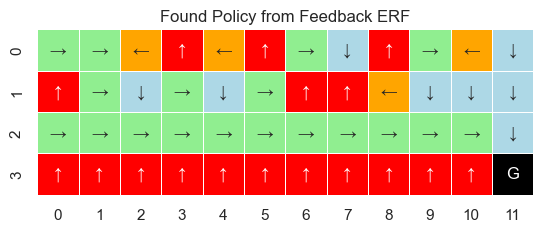

In [2]:

env_names = ['CliffWalking-v0', "FrozenLake-v1"]
start_states = [36, 0, 0, 0]
optimal_vals = [-13, 1, 21, 0]
goal_states = [(3, 11), (3, 3), (0, 0), (0, 0)]

# change index 0 = cliffwalk, 1 = frozenlake
chosen_env = 0

env_name = env_names[chosen_env]
learning_rate = 0.1
discount = 0.95
epsilon = 1
epsilon_decay = 0.01
num_episodes = 1000
num_q_updates = 5
max_steps_per_episode = 50
noise = 0.1
delay = 5
batches = 5
feedback_variants = ['IBF', 'ABF', 'ERF', 'SRF']
feedback_var = feedback_variants[2]

env = gym.make(env_name)
goal_state = goal_states[chosen_env]

file_path = os.path.join(parent_dir, rf"Feedback\{env_name}_feedback.txt")

feedback_filehandler = FeedbackFileHandler(file_path)
feedback = feedback_filehandler.load_dict_from_file()
print(feedback)
agent = FeedbackAgent(env_name, feedback, learning_rate, discount, epsilon, epsilon_decay, max_steps_per_episode,
                      num_episodes, num_q_updates, noise, delay, batches, feedback_var)
feedback_q_table, true_rewards_all_episodes, rm_rewards_all_episodes = agent.feedback_learning()
agent.visualize_policy(feedback_q_table, env, goal_state)

start_state = start_states[chosen_env]

optimal_val = optimal_vals[chosen_env]


In [3]:
def print_q_vals_and_reward():
    for s, a in feedback:
        for a_prime in range(4):
            print()
            if a_prime == a:
                print('should be optimal!')
            print('q-value for state action pair: ', (s, a_prime), 'q: ', feedback_q_table[s][a_prime])
            print('reward for state action pair ', (s, a_prime), 'r: ', reward_model.get_reward(s, a_prime))

# Print Q-Table values from the feedback to see how high they are

***Feedback Agent rewards***


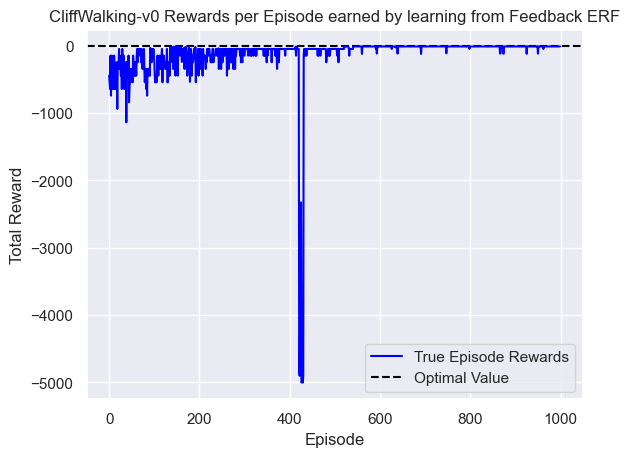


should be optimal!
q-value for state action pair:  (36, 0) q:  -2.6686661834194116
reward for state action pair  (36, 0) r:  -1.839317798614502

q-value for state action pair:  (36, 1) q:  -16.024396456710075
reward for state action pair  (36, 1) r:  -3.1545968055725098

q-value for state action pair:  (36, 2) q:  -11.435629325510247
reward for state action pair  (36, 2) r:  -2.9812638759613037

q-value for state action pair:  (36, 3) q:  -12.801391955085503
reward for state action pair  (36, 3) r:  -2.3833789825439453

q-value for state action pair:  (24, 0) q:  -14.090309715245116
reward for state action pair  (24, 0) r:  -2.444554090499878

should be optimal!
q-value for state action pair:  (24, 1) q:  -0.9357690032015528
reward for state action pair  (24, 1) r:  -0.46349117159843445

q-value for state action pair:  (24, 2) q:  -6.914330252537711
reward for state action pair  (24, 2) r:  -1.942664384841919

q-value for state action pair:  (24, 3) q:  -7.716239227824265
reward for s

In [4]:
print("***Feedback Agent rewards***")
agent.plot_rewards(optimal_val)
reward_model = agent.agent.reward_model

print_q_vals_and_reward()
#print('whole q-table', feedback_q_table)


In [5]:
agent.visualize_results()

**** Total reward **** -13
**** all Actions **** [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]
